# Getting started:

# Importing Libraries:

In [1]:
import numpy as np
import pandas as pd

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
    #    print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

In [3]:
#checking tensorflow version
tf.__version__

'2.4.1'

# Preprocessing:

In [4]:
image_dir = Path('../input/braille-character-dataset/Braille Dataset/Braille Dataset')

In [5]:
#how many images
dir_list = list(image_dir.glob('*.jpg'))

In [6]:
image_count = len(dir_list)
image_count

1560

In [7]:
#generates a list with the filenames
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [8]:
#opens images and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [9]:
#turn both lists in numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T

In [10]:
#encodes name_list and normalizes image_list
le = LabelEncoder()
name_list = le.fit_transform(name_list)
images_list = images_list / 255.0

In [11]:
images_list.shape

(1560, 28, 28, 3)

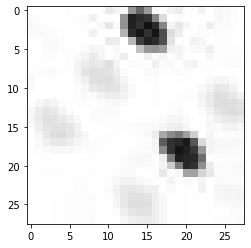

In [12]:
plt.imshow(images_list[0])

In [13]:
images_list.shape

(1560, 28, 28, 3)

In [14]:
name_list.shape

(1560,)

# Splitting in train and test data:

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

# Creating model:

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [18]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [19]:
from keras.callbacks import EarlyStopping

In [20]:
es1 = EarlyStopping(patience=20, monitor="val_acc", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/1000
28/28 [==============================] - 5s 157ms/step - loss: 3.2689 - sparse_categorical_accuracy: 0.0260 - val_loss: 3.2622 - val_sparse_categorical_accuracy: 0.0160
Epoch 2/1000
28/28 [==============================] - 4s 133ms/step - loss: 3.2485 - sparse_categorical_accuracy: 0.0599 - val_loss: 3.1686 - val_sparse_categorical_accuracy: 0.0373
Epoch 3/1000
28/28 [==============================] - 4s 134ms/step - loss: 2.5433 - sparse_categorical_accuracy: 0.2928 - val_loss: 1.7572 - val_sparse_categorical_accuracy: 0.4267
Epoch 4/1000
28/28 [==============================] - 4s 131ms/step - loss: 1.3007 - sparse_categorical_accuracy: 0.6124 - val_loss: 1.2926 - val_sparse_categorical_accuracy: 0.6667
Epoch 5/1000
28/28 [==============================] - 4s 132ms/step - loss: 0.7521 - sparse_categorical_accuracy: 0.7658 - val_loss: 0.8945 - val_sparse_categorical_accuracy: 0.7467
Epoch 6/1000
28/28 [==============================] - 4s 133ms/step - loss: 0.4671 - spars

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

# Evaluating model:

In [22]:
time = np.arange(1, len(history.history['loss'])+1)

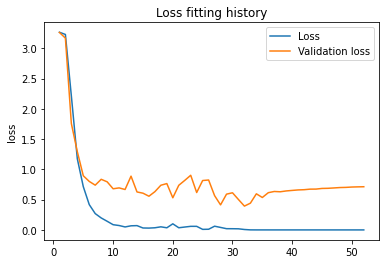

In [23]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

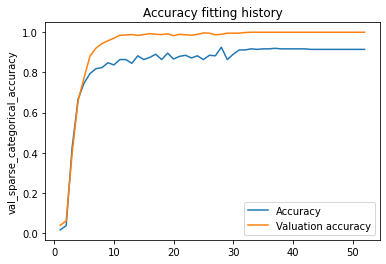

In [24]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])

In [25]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 31ms/step - loss: 0.8483 - sparse_categorical_accuracy: 0.9071


[0.8482798933982849, 0.9070512652397156]